Josh Hoge

jsh10043@nyu.edu

NYU Tandon Data Science Bootcamp Week 3 Exercises


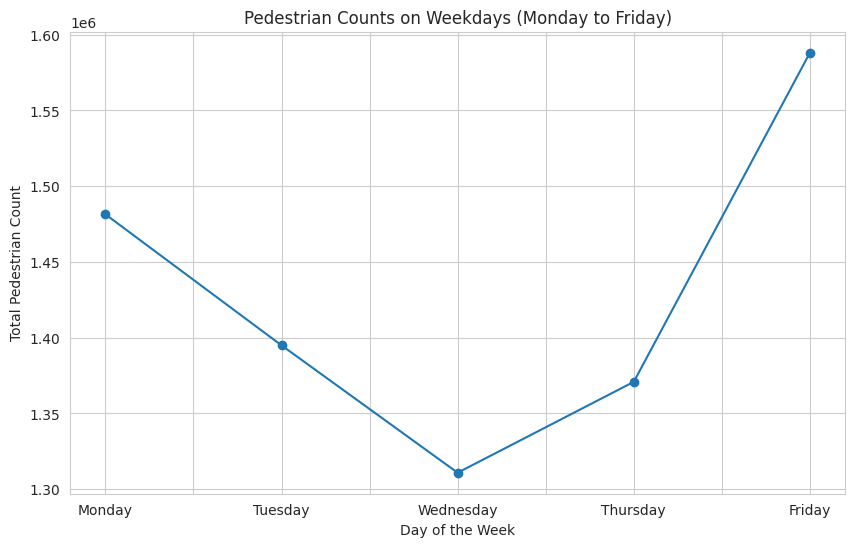

In [19]:
# Exercise 1
# Filter the data to include only weekdays (Monday to Friday) and plot a line
# graph showing the pedestrian counts for each day of the week.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv')

# convert 'hour_beginning' to datetime objects
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format='%Y %b %d %I:%M:%S %p')

# convert Pedestrians object to numeric type
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'].str.replace(',', ''), errors='coerce')

# filter for weekdays (Monday=0, Sunday=6)
weekdays_df = df[df['hour_beginning'].dt.dayofweek < 5]

# group by day of the week and sum the pedestrian counts
weekday_counts = weekdays_df.groupby(weekdays_df['hour_beginning'].dt.dayofweek)['Pedestrians'].sum()

# rename numeric indexes to weekday names
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# plot the line graph
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line', marker='o')
plt.title('Pedestrian Counts on Weekdays (Monday to Friday)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()



Brooklyn Bridge Pedestrian Traffic Analysis for 2019

Total records in 2019: 8761
Date range: 2019-01-01 00:00:00 to 2019-12-31 23:00:00
Total pedestrians in 2019: 6,011,174


Pedestrian COunts by Weather Condition (Sorted by Total)


                     Total_Pedestrians  Avg_Pedestrians_Per_Hour  \
weather_summary                                                    
partly-cloudy-day              2790868                   1574.09   
clear-day                      1953025                   1382.18   
cloudy                          984867                    543.23   
rain                            139502                    229.82   
partly-cloudy-night              63794                     52.77   
clear-night                      61815                     33.23   
snow                              8460                    222.63   
fog                               4673                    212.41   
wind                              2716                    679.00   
sleet            

/tmp/ipython-input-702343754.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_precip.loc[:, 'precip_category'] = pd.cut(clean_precip['precipitation'],


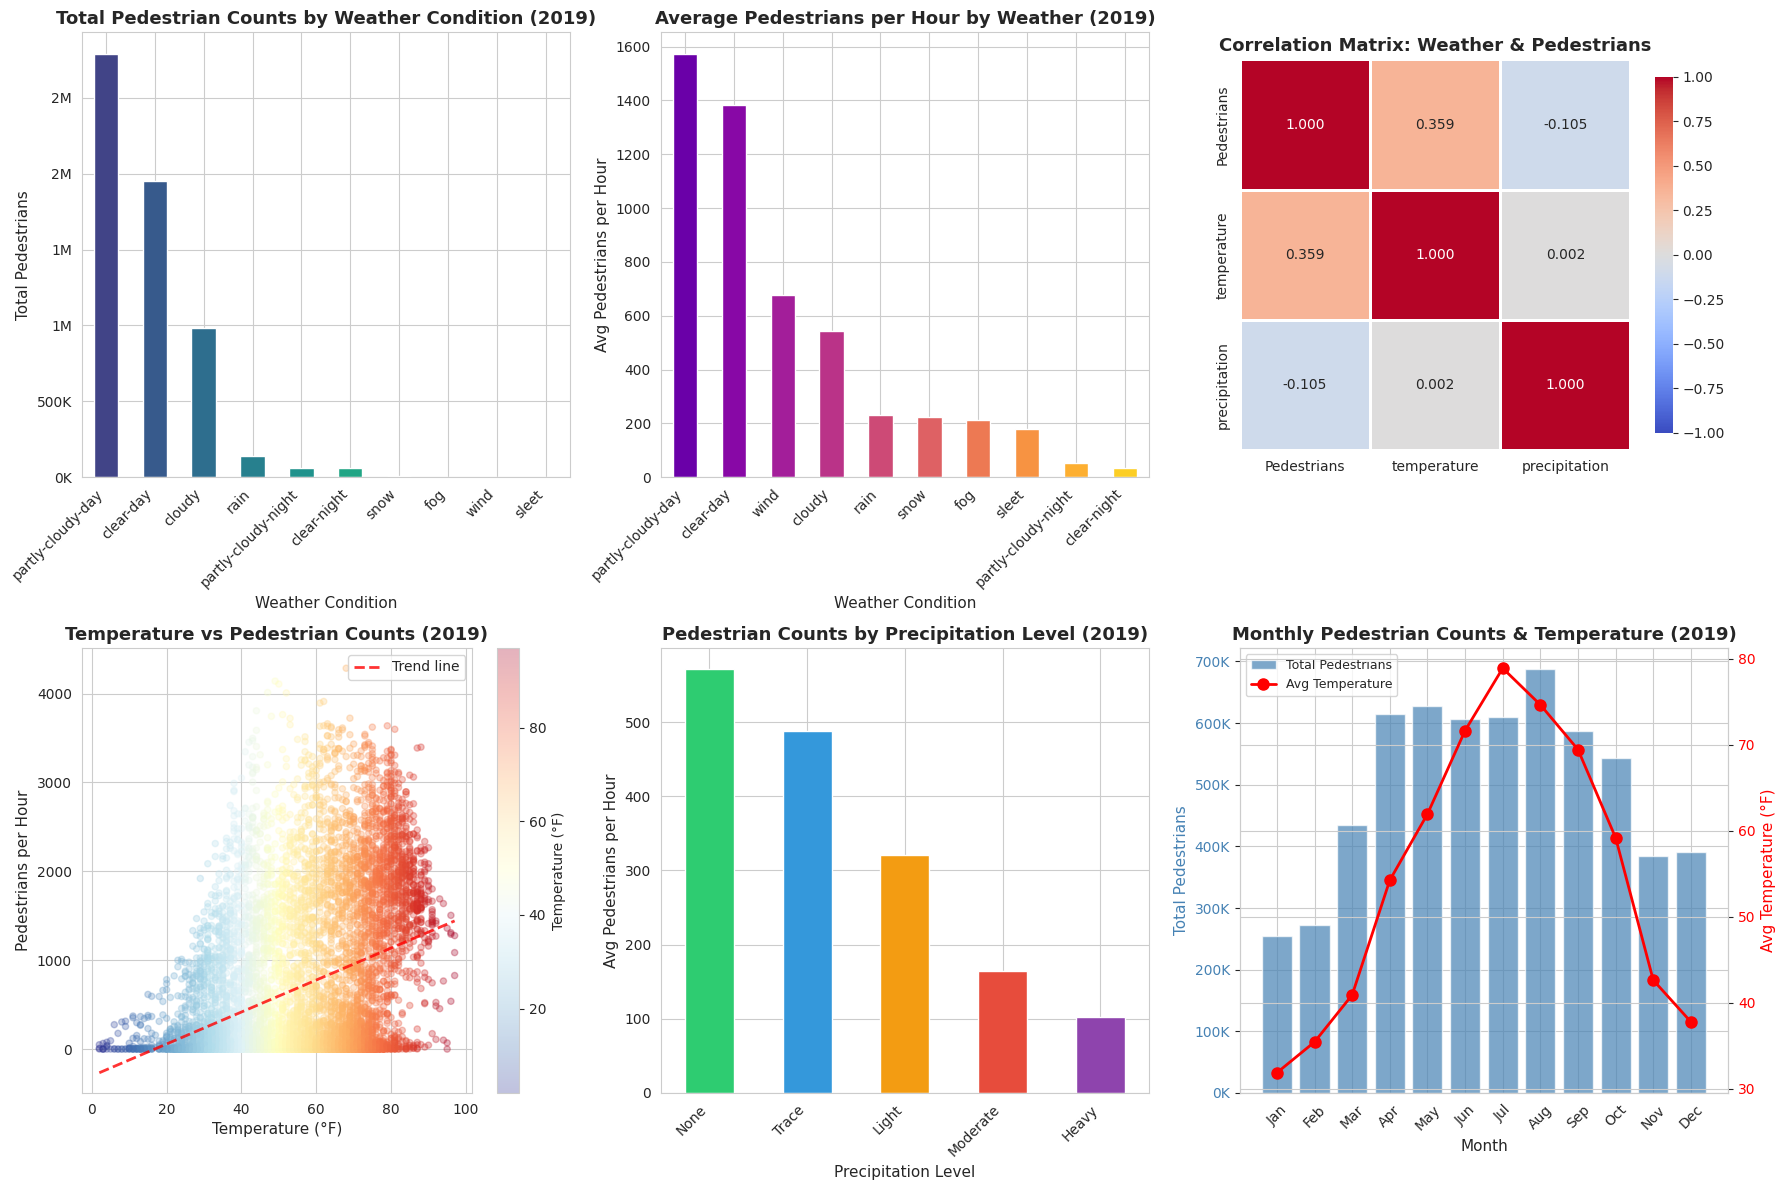

In [20]:
# Exercise 2
# Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze
# how different weather conditions influence pedestrian activity in that year.
# Sort the pedestrian count data by weather summary to identify any correlations
# (with a correlation matrix) between weather patterns and pedestrian counts for
# the selected year.
# this is a lot of work...

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv')

# convert 'hour_beginning' to datetime objects
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format='%Y %b %d %I:%M:%S %p')

# convert Pedestrians object to numeric type
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'].str.replace(',', ''), errors='coerce')

# filter for year 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019].copy()

# statistics
print("Brooklyn Bridge Pedestrian Traffic Analysis for 2019")
print(f"\nTotal records in 2019: {len(df_2019)}")
print(f"Date range: {df_2019['hour_beginning'].min()} to {df_2019['hour_beginning'].max()}")
print(f"Total pedestrians in 2019: {df_2019['Pedestrians'].sum():,}")

# sort by weather summary and analyze
print("\n")
print("Pedestrian Counts by Weather Condition (Sorted by Total)")
print("\n")

weather_analysis = df_2019.groupby('weather_summary').agg({
    'Pedestrians': ['sum', 'mean', 'count'],
    'temperature': 'mean',
    'precipitation': 'mean'
}).round(2)

weather_analysis.columns = ['Total_Pedestrians', 'Avg_Pedestrians_Per_Hour', 'Hours_Recorded',
                             'Avg_Temperature', 'Avg_Precipitation']
weather_analysis = weather_analysis.sort_values('Total_Pedestrians', ascending=False)

print(weather_analysis)

# correlation matrix
print("\n")
print("Correlation Matrix: Weather Variables vs Pedestrian Counts")
print("\n")

# select numeric columns for correlation
correlation_data = df_2019[['Pedestrians', 'temperature', 'precipitation']].dropna()
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

# plain language interpretation
print("\nInterpretation:")
print("• Higher temperatures moderately increase pedestrian activity")
print("• Precipitation slightly decreases pedestrian activity")
print("\n")


# visualization
# set the overall seaborn style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# create a multi-plot visualization; thank you stackoverflow
fig = plt.figure(figsize=(18, 12))

# panel 1: bar chart of total pedestrians by weather condition
ax1 = plt.subplot(2, 3, 1)
weather_totals = df_2019.groupby('weather_summary')['Pedestrians'].sum().sort_values(ascending=False)
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(weather_totals)))
weather_totals.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Total Pedestrian Counts by Weather Condition (2019)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Weather Condition', fontsize=11)
ax1.set_ylabel('Total Pedestrians', fontsize=11)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x/1e3)}K'))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# panel 2: average pedestrians per hour by weather
ax2 = plt.subplot(2, 3, 2)
weather_avg = df_2019.groupby('weather_summary')['Pedestrians'].mean().sort_values(ascending=False)
colors2 = plt.cm.plasma(np.linspace(0.2, 0.9, len(weather_avg)))
weather_avg.plot(kind='bar', ax=ax2, color=colors2)
ax2.set_title('Average Pedestrians per Hour by Weather (2019)', fontsize=13, fontweight='bold')
ax2.set_xlabel('Weather Condition', fontsize=11)
ax2.set_ylabel('Avg Pedestrians per Hour', fontsize=11)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# panel 3: correlation heatmap
ax3 = plt.subplot(2, 3, 3)
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax3,
            vmin=-1, vmax=1)
ax3.set_title('Correlation Matrix: Weather & Pedestrians', fontsize=13, fontweight='bold')

# panel 4: temperature vs Pedestrians scatter plot
ax4 = plt.subplot(2, 3, 4)
clean_data = df_2019.dropna(subset=['temperature', 'Pedestrians'])
scatter = ax4.scatter(clean_data['temperature'], clean_data['Pedestrians'],
                     alpha=0.3, s=20, c=clean_data['temperature'], cmap='RdYlBu_r')
ax4.set_title('Temperature vs Pedestrian Counts (2019)', fontsize=13, fontweight='bold')
ax4.set_xlabel('Temperature (°F)', fontsize=11)
ax4.set_ylabel('Pedestrians per Hour', fontsize=11)
z = np.polyfit(clean_data['temperature'], clean_data['Pedestrians'], 1)
p = np.poly1d(z)
ax4.plot(clean_data['temperature'].sort_values(), p(clean_data['temperature'].sort_values()),
         "r--", alpha=0.8, linewidth=2, label=f'Trend line')
ax4.legend()
plt.colorbar(scatter, ax=ax4, label='Temperature (°F)')

# panel 5: precipitation vs pedestrians
ax5 = plt.subplot(2, 3, 5)
clean_precip = df_2019.dropna(subset=['precipitation', 'Pedestrians'])
precip_bins = [0, 0.001, 0.01, 0.05, 0.1, clean_precip['precipitation'].max()]
precip_labels = ['None', 'Trace', 'Light', 'Moderate', 'Heavy']
clean_precip.loc[:, 'precip_category'] = pd.cut(clean_precip['precipitation'],
                                                  bins=precip_bins, labels=precip_labels)
precip_avg = clean_precip.groupby('precip_category', observed=True)['Pedestrians'].mean()
colors3 = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#8e44ad']
precip_avg.plot(kind='bar', ax=ax5, color=colors3)
ax5.set_title('Pedestrian Counts by Precipitation Level (2019)', fontsize=13, fontweight='bold')
ax5.set_xlabel('Precipitation Level', fontsize=11)
ax5.set_ylabel('Avg Pedestrians per Hour', fontsize=11)
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45, ha='right')

# panel 6: monthly weather patterns
ax6 = plt.subplot(2, 3, 6)
df_2019['month'] = df_2019['hour_beginning'].dt.month
monthly_data = df_2019.groupby('month').agg({
    'Pedestrians': 'sum',
    'temperature': 'mean'
})

ax6_temp = ax6.twinx()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax6.bar(monthly_data.index, monthly_data['Pedestrians'], alpha=0.7, color='steelblue', label='Total Pedestrians')
ax6_temp.plot(monthly_data.index, monthly_data['temperature'], 'r-o', linewidth=2, markersize=8, label='Avg Temperature')

ax6.set_title('Monthly Pedestrian Counts & Temperature (2019)', fontsize=13, fontweight='bold')
ax6.set_xlabel('Month', fontsize=11)
ax6.set_ylabel('Total Pedestrians', fontsize=11, color='steelblue')
ax6_temp.set_ylabel('Avg Temperature (°F)', fontsize=11, color='red')
ax6.tick_params(axis='y', labelcolor='steelblue')
ax6_temp.tick_params(axis='y', labelcolor='red')
ax6.set_xticks(monthly_data.index)
ax6.set_xticklabels(months, rotation=45)
ax6.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e3)}K'))

lines1, labels1 = ax6.get_legend_handles_labels()
lines2, labels2 = ax6_temp.get_legend_handles_labels()
ax6.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()



In [23]:
# Exercise 3
# Implement a custom function to categorize time of day into morning, afternoon,
# evening, and night, and create a new column in the DataFrame to store these
# categories. Use this new column to analyze pedestrian activity patterns
# throughout the day. (no plots required, just stats, so use pandas)

import pandas as pd

# custom function to categorize morning, afternoon, evening, night
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df = pd.read_csv('Brooklyn_Bridge_Automated_Pedestrian_Counts_Demonstration_Project_20251014.csv')

# convert 'hour_beginning' to datetime objects
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format='%Y %b %d %I:%M:%S %p')

# convert 'Pedestrians' column to numeric (handle commas)
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'].str.replace(',', ''), errors='coerce')



# extract hour from datetime
df['hour'] = df['hour_beginning'].dt.hour

# apply custom function to create new 'time_of_day' column
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)

# Create ordered categorical variable for proper sorting
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=time_order, ordered=True)

print("\n" )
print("Statistical Analysis by Time oF Day:")

# aggregate statistics
time_stats = df.groupby('time_of_day', observed=True).agg({
    'Pedestrians': ['count', 'sum', 'mean', 'median', 'std', 'min', 'max']
}).round(2)

time_stats.columns = ['Hours_Recorded', 'Total_Pedestrians', 'Mean', 'Median',
                      'Std_Dev', 'Min', 'Max']

# calculate percentage of total activity
time_stats['Percentage'] = (time_stats['Total_Pedestrians'] /
                            time_stats['Total_Pedestrians'].sum() * 100).round(2)

print("\nStatistics by Time Period:")
print(time_stats)

print("\n")
print("Hourly Breakdown by Time Period:")

for period in time_order:
    period_data = df[df['time_of_day'] == period]
    hourly = period_data.groupby('hour')['Pedestrians'].agg(['count', 'mean', 'sum'])
    print(f"\n{period.upper()} ({hourly['count'].sum():,} total hours recorded):")
    print(hourly.round(0))


print("\n")
print("Peak Hours Identification:")

hourly_avg = df.groupby('hour')['Pedestrians'].mean().sort_values(ascending=False)

print("\nTop 5 Busiest Hours:")
for i, (hour, avg) in enumerate(hourly_avg.head(5).items(), 1):
    period = categorize_time_of_day(hour)
    print(f"  {i}. {hour:02d}:00 - Avg: {avg:,.0f} pedestrians ({period})")

print("\nTop 5 Quietest Hours:")
for i, (hour, avg) in enumerate(hourly_avg.tail(5).items(), 1):
    period = categorize_time_of_day(hour)
    print(f"  {i}. {hour:02d}:00 - Avg: {avg:,.0f} pedestrians ({period})")


print("\n")
print("Weekday vs Weekend Comparison:")

df['day_type'] = df['hour_beginning'].dt.dayofweek.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

comparison = df.groupby(['day_type', 'time_of_day'], observed=True)['Pedestrians'].mean()
comparison_table = comparison.unstack()

print("\nAverage Pedestrians per Hour:")
print(comparison_table.round(0))

# calculate percentage difference
print("\nWeekend vs Weekday Difference (%):")
diff = ((comparison_table.loc['Weekend'] - comparison_table.loc['Weekday']) /
        comparison_table.loc['Weekday'] * 100)
print(diff.round(1))


print("\n")
print("Key Findings:")

busiest_period = time_stats['Total_Pedestrians'].idxmax()
busiest_hour = df.groupby('hour')['Pedestrians'].sum().idxmax()
quietest_period = time_stats['Total_Pedestrians'].idxmin()

print(f"\n1. Busiest Time Period: {busiest_period}")
print(f"   - Accounts for {time_stats.loc[busiest_period, 'Percentage']:.1f}% of all pedestrian activity")
print(f"   - Average of {time_stats.loc[busiest_period, 'Mean']:.0f} pedestrians per hour")

print(f"\n2. Peak Single Hour: {busiest_hour:02d}:00 ({categorize_time_of_day(busiest_hour)})")
print(f"   - Total of {df[df['hour'] == busiest_hour]['Pedestrians'].sum():,} pedestrians recorded")

print(f"\n3. Quietest Period: {quietest_period}")
print(f"   - Only {time_stats.loc[quietest_period, 'Percentage']:.1f}% of total activity")
print(f"   - Average of {time_stats.loc[quietest_period, 'Mean']:.0f} pedestrians per hour")

print(f"\n4. Weekend Effect:")
for period in time_order:
    weekend_val = comparison_table.loc['Weekend', period]
    weekday_val = comparison_table.loc['Weekday', period]
    pct_diff = ((weekend_val - weekday_val) / weekday_val * 100)
    print(f"   - {period}: {'+' if pct_diff > 0 else ''}{pct_diff:.1f}% {'more' if pct_diff > 0 else 'less'} traffic on weekends")






Statistical Analysis by Time oF Day:

Statistics by Time Period:
             Hours_Recorded  Total_Pedestrians     Mean  Median  Std_Dev  Min  \
time_of_day                                                                     
Morning                4014            2466776   614.54   367.0   619.68    0   
Afternoon              4014            6803093  1694.84  1723.5   812.79    0   
Evening                2676            1596480   596.59   270.0   694.50    0   
Night                  5353             166517    31.11     6.0    77.02    0   

              Max  Percentage  
time_of_day                    
Morning      4330       22.36  
Afternoon    4286       61.66  
Evening      3137       14.47  
Night        1402        1.51  


Hourly Breakdown by Time Period:

MORNING (4,014 total hours recorded):
      count    mean     sum
hour                       
6       669    87.0   58423
7       669   185.0  123490
8       669   310.0  207233
9       669   554.0  370755
10      669 